# **Quality Cleaning**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
# Leemos el df procesado
ubicacion_drive = '/content/drive/MyDrive/6672_Business Predictive Analytics_TF_Grupo 5/FuentesDatos'
df_heavy = pd.read_pickle(f'{ubicacion_drive}/df_heavy_procesado.pickle')

In [ ]:
df_heavy.head(3)

,Unnamed: 0,SOC,SOH,Charging_Cycles,Battery_Temp,Motor_RPM,Motor_Torque,Motor_Temp,Brake_Pad_Wear,Charging_Voltage,Tire_Pressure,DTC
0,2020-01-01 00:00:00,20.0,99.999757,0,31.822998,0.0,0.0,64.937230,100.0,400,34.987175,0
1,2020-01-01 01:00:00,20.0,99.999495,0,31.596741,0.0,0.0,71.637683,100.0,400,34.976006,0
2,2020-01-01 02:00:00,20.0,99.999244,0,31.694791,0.0,0.0,76.626964,100.0,400,34.961510,0


## **Overview Data**

In [ ]:
# Visualización general de los datos
df_heavy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43800 entries, 0 to 43799
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        43800 non-null  object 
 1   SOC               43800 non-null  float64
 2   SOH               43800 non-null  float64
 3   Charging_Cycles   43800 non-null  int64  
 4   Battery_Temp      43800 non-null  float64
 5   Motor_RPM         43800 non-null  float64
 6   Motor_Torque      43800 non-null  float64
 7   Motor_Temp        43800 non-null  float64
 8   Brake_Pad_Wear    43800 non-null  float64
 9   Charging_Voltage  43800 non-null  int64  
 10  Tire_Pressure     43800 non-null  float64
 11  DTC               43800 non-null  object 
dtypes: float64(8), int64(2), object(2)
memory usage: 4.0+ MB


In [ ]:
# Visualización general de las variables númericas
df_heavy.describe()

,SOC,SOH,Charging_Cycles,Battery_Temp,Motor_RPM,Motor_Torque,Motor_Temp,Brake_Pad_Wear,Charging_Voltage,Tire_Pressure
count,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.0,43800.000000
mean,60.817630,94.370603,80.127329,35.229109,936.372513,187.274503,73.179096,67.216827,400.0,28.519119
std,23.251624,3.225082,55.288573,8.593342,1285.998029,257.199606,8.045529,19.881618,0.0,2.056479
min,20.000000,84.549563,0.000000,21.687029,0.000000,0.000000,57.677255,29.985945,400.0,24.985802
25%,40.805185,91.632924,30.000000,29.521866,0.000000,0.000000,68.498325,50.819838,400.0,26.740318
50%,60.718705,93.641809,74.000000,31.574952,0.000000,0.000000,70.827440,68.093027,400.0,28.512844
75%,80.990738,97.369855,124.000000,38.855954,1532.385970,306.477194,73.897828,84.402397,400.0,30.280491
max,100.000000,99.999757,192.000000,65.834883,4746.911143,949.382229,110.348979,100.000000,400.0,34.987175


In [ ]:
# Correción de las cabeceras
columnas_renombrar = {'Unnamed: 0': 'timestamp',
                      'Charging_Cycles': 'charging_cycles',
                      'Battery_Temp': 'battery_temp',
                      'Motor_RPM': 'motor_rpm',
                      'Motor_Torque': 'motor_torque',
                      'Motor_Temp': 'motor_temp',
                      'Brake_Pad_Wear': 'brake_pad_wear',
                      'Charging_Voltage': 'charging_voltage',
                      'Tire_Pressure': 'tire_pressure',
                      }
df_heavy = df_heavy.rename(columns=columnas_renombrar)

In [ ]:
df_heavy.head(3)

,timestamp,SOC,SOH,charging_cycles,battery_temp,motor_rpm,motor_torque,motor_temp,brake_pad_wear,charging_voltage,tire_pressure,DTC
0,2020-01-01 00:00:00,20.0,99.999757,0,31.822998,0.0,0.0,64.937230,100.0,400,34.987175,0
1,2020-01-01 01:00:00,20.0,99.999495,0,31.596741,0.0,0.0,71.637683,100.0,400,34.976006,0
2,2020-01-01 02:00:00,20.0,99.999244,0,31.694791,0.0,0.0,76.626964,100.0,400,34.961510,0


## **Data Type Mismatch**

In [ ]:
# Casteo de los tipos de datos de las columnas
print(f'Tipos de datos de las columnas antes de castear: \n{df_heavy.dtypes}')

df_heavy['timestamp'] = pd.to_datetime(df_heavy['timestamp'], errors='coerce')
df_heavy['DTC'] = df_heavy['DTC'].astype('category')

print(f'\nTipos de datos de las columnas después de castear: \n{df_heavy.dtypes}')

Tipos de datos de las columnas antes de castear: 
timestamp            object
SOC                 float64
SOH                 float64
charging_cycles       int64
battery_temp        float64
motor_rpm           float64
motor_torque        float64
motor_temp          float64
brake_pad_wear      float64
charging_voltage      int64
tire_pressure       float64
DTC                  object
dtype: object

Tipos de datos de las columnas después de castear: 
timestamp           datetime64[ns]
SOC                        float64
SOH                        float64
charging_cycles              int64
battery_temp               float64
motor_rpm                  float64
motor_torque               float64
motor_temp                 float64
brake_pad_wear             float64
charging_voltage             int64
tire_pressure              float64
DTC                       category
dtype: object


## **Uniform Data**

In [ ]:
# Verificamos si existen duplicados
df_heavy.duplicated().sum()

np.int64(0)

In [ ]:
# Verificar si existen datos unicos
df_heavy.nunique().sort_values(ascending=True)

,0
charging_voltage,1
DTC,9
charging_cycles,193
SOC,17714
motor_torque,18247
motor_rpm,18247
brake_pad_wear,18248
SOH,43800
motor_temp,43800
battery_temp,43800


**Observaciones:** Vemos que la columna **charging_voltage** es de un único valor, por lo que no nos aporta valor en el análisis. Y lo mismo con la columna **timestamp**, porque el modelo mirará el "estado" del vehículo en un momento, y decide si falla o no, por lo tanto no es una feature directa

In [ ]:
print(f'Tamaño del dataset antes de eliminar la columna charging_voltage y timestamp: {df_heavy.shape}')
df_heavy = df_heavy.drop(columns=['charging_voltage', 'timestamp'])
print(f'Tamaño del dataset después de eliminar la columna charging_voltage y timestamp: {df_heavy.shape}')

Tamaño del dataset antes de eliminar la columna charging_voltage y timestamp: (43800, 12)
Tamaño del dataset después de eliminar la columna charging_voltage y timestamp: (43800, 10)


## **Missing Values**

In [ ]:
# Verificamos los valores nulos
df_heavy.isna().sum()

,0
SOC,0
SOH,0
charging_cycles,0
battery_temp,0
motor_rpm,0
motor_torque,0
motor_temp,0
brake_pad_wear,0
tire_pressure,0
DTC,0


**Observaciones:** Vemos que no existen nulos, por lo tanto no se eliminan

## **Outliers**

In [ ]:
# Creamos dos subdatasets para las variables categoricas y númericas
df_heavy_cat = df_heavy.select_dtypes(include=['category'])
df_heavy_num = df_heavy.select_dtypes(include=['number'])

In [ ]:
df_heavy_num.head(3)

,SOC,SOH,charging_cycles,battery_temp,motor_rpm,motor_torque,motor_temp,brake_pad_wear,tire_pressure
0,20.0,99.999757,0,31.822998,0.0,0.0,64.937230,100.0,34.987175
1,20.0,99.999495,0,31.596741,0.0,0.0,71.637683,100.0,34.976006
2,20.0,99.999244,0,31.694791,0.0,0.0,76.626964,100.0,34.961510


In [ ]:
df_heavy_cat.head(3)

,DTC
0,0
1,0
2,0


### **Análisis de columnas categorícas**

In [ ]:
# Verificar la cantidad de códigos DTC que no presentaron fallas
df_heavy_cat[df_heavy_cat['DTC'] == '0'].value_counts().sum()

np.int64(42594)

In [ ]:
# Verificar la cantidad de códigos DTC que presentaron fallas
df_heavy_cat[df_heavy_cat['DTC'] != '0'].value_counts().sum()

np.int64(1206)

In [ ]:
# Gráficar por cada tipo de Códigos DTC
def graficar_codigos_dtc(df_heavy_cat):
  ax = df_heavy_cat['DTC'].value_counts().plot(kind='bar')
  ax.set_ylabel("Frecuencia")
  ax.set_xlabel("Códigos DTC")
  ax.set_title("Frecuencia de Códigos DTC");

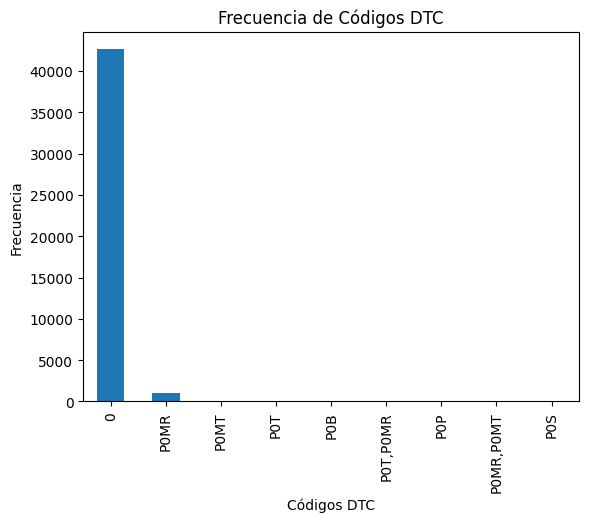

In [ ]:
# Visualizar códigos DTC
graficar_codigos_dtc(df_heavy_cat)

**Observaciones:** Como se busca que modelo prediga que el automovil tenga o no fallas, entonces es necesario juntar los códigos de fallas en una sola categoría

In [ ]:
# Reemplazar los códigos con falla (P0MR, P0MT, P0T, etc) por 1
df_heavy_cat['DTC'] = df_heavy_cat['DTC'].apply(lambda x: 0 if x == '0' else 1)

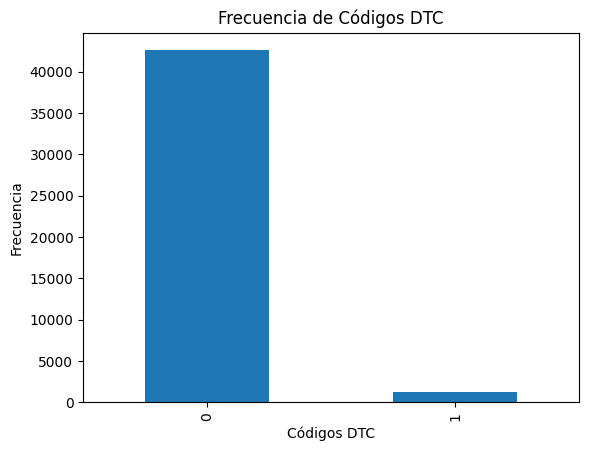

In [ ]:
# Visualizar códigos DTC después de imputación
graficar_codigos_dtc(df_heavy_cat)

### **Análisis de columnas númericas**

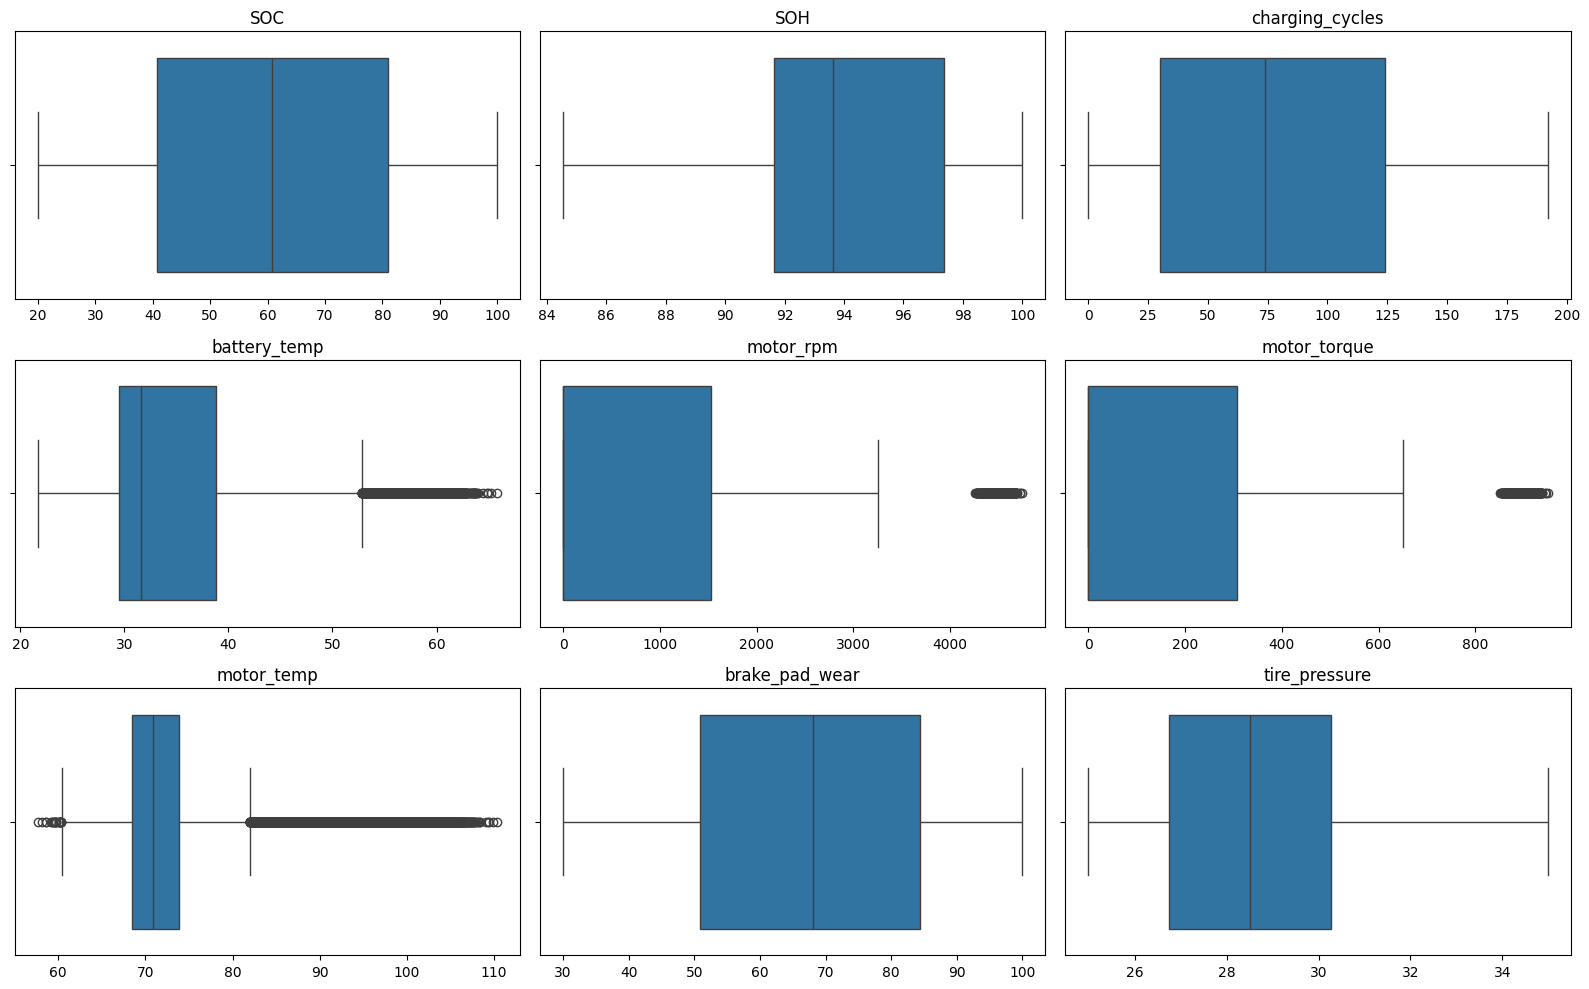

In [ ]:
# Analizar variables númericas con gráfico bloxplot
def graficar_boxplot(df_heavy_num):
  columnas = df_heavy_num.columns

  fig, axs = plt.subplots(3, 3, figsize=(16, 10))
  axs = axs.flatten()

  for i, col in enumerate(columnas):
    sns.boxplot(x=df_heavy_num[col], ax=axs[i])
    axs[i].set_title(col)
    axs[i].set_xlabel('')
    axs[i].set_ylabel('');
    plt.tight_layout();

graficar_boxplot(df_heavy_num)

**Observaciones:**
- SOC: Entre 20% y 100%, no tiene outliers, esto es lo esperado porque la batería nunca baja de 0 ni sube de 100
- SOH: Entre 85% y 100%, no tiene outliers, esto quiere decir que los vehículos están relativamente nuevos
- Charging_cycles: Entre 0 y 200%, tienen una distribución normal, no tienen outliers, se observa que tiene una gran variabilidad de ciclos de carga, esto puede variar por el uso de los vehículos
- Battery_temp: Entre 20 y 53 C°, si tiene varios outiliers, pero esto puede significa que tienen fallos como sistema de refrigeración deficiente, trayectos de carga rápida prolongada, estos outliers no se elimina porque son valiosos para predecir fallos **IMPORTARTE**
- Motor_rpm: Entre 0 y 3300 RPM, tiene outliers cerca de 4500 RPM, estos no se eliminan porque indican sobreaceleración, carga excesiva, modos de emergerngia, son valiosos para predecir fallos **IMPORTANTE**
- Motor_torque: Entre 0 y 6400 Nm, tiene outliers entre 850-900 Nm, estos vehículos eléctricos tienen altas señales de riesgo por resistencia aumentada, errores de sensor CPS, error en la rotación de las ruedas, no se eliminan, son valiosos para predecir fallos **IMPORTANTE**
- Motor_temp: Entre 60-81 C°, tiene outliers muy altos entre 82-110 C°, indica posiblemente sobrecalentamiento del motor, fallos en bomba de refrigeración, fallos en bomba de refrigeración, fallos de rotor, estos outliers son esencialmente ALERTS, no se eliminan, son valiosos para predecir fallos **IMPORTANTE**
- Brake_pad_wear: Entre 30-100, no tiene outliers extremos
- Tire_pressure: Entre 23-35, no tiene outliers extremos

## **Basic Stadistics**

In [ ]:
# Observamos las dimensiones de las variables númericas y categorica
print(f'Dimensiones del dataset de variables númericas: {df_heavy_num.shape}')
print(f'Dimensiones del dataset de variables categoricas: {df_heavy_cat.shape}')

Dimensiones del dataset de variables númericas: (43800, 9)
Dimensiones del dataset de variables categoricas: (43800, 1)


In [ ]:
# Vista general de las variables númericas
df_heavy_num.describe()

,SOC,SOH,charging_cycles,battery_temp,motor_rpm,motor_torque,motor_temp,brake_pad_wear,tire_pressure
count,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000
mean,60.817630,94.370603,80.127329,35.229109,936.372513,187.274503,73.179096,67.216827,28.519119
std,23.251624,3.225082,55.288573,8.593342,1285.998029,257.199606,8.045529,19.881618,2.056479
min,20.000000,84.549563,0.000000,21.687029,0.000000,0.000000,57.677255,29.985945,24.985802
25%,40.805185,91.632924,30.000000,29.521866,0.000000,0.000000,68.498325,50.819838,26.740318
50%,60.718705,93.641809,74.000000,31.574952,0.000000,0.000000,70.827440,68.093027,28.512844
75%,80.990738,97.369855,124.000000,38.855954,1532.385970,306.477194,73.897828,84.402397,30.280491
max,100.000000,99.999757,192.000000,65.834883,4746.911143,949.382229,110.348979,100.000000,34.987175


In [ ]:
# Vista general de la variable categoríca
df_heavy_cat.describe()

,DTC
count,43800.000000
mean,0.027534
std,0.163636
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [ ]:
# Guardamos las variables en un archivo .pickle
df_heavy_num.to_pickle(f'{ubicacion_drive}/df_heavy_num.pickle')
df_heavy_cat.to_pickle(f'{ubicacion_drive}/df_heavy_cat.pickle')